# import nessesary libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



# load dataset

In [40]:
dataset = pd.read_csv('diabetes.csv')


# Data Exploration

In [41]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [43]:
print(dataset.describe())



       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [44]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Data Preprocessing

In [45]:
# missing data
dataset.fillna(dataset.mean(), inplace=True)


# Normalization

In [46]:
scaler = MinMaxScaler()
#  Min-Max scaling 
cols_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
dataset[cols_to_scale] = scaler.fit_transform(dataset[cols_to_scale])

# Check the scaled data
print(dataset.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567  0.166667        0  
2                  0.253629  0.183333        1  
3                  0.038002  0.000000        0  
4                  0.943638  0.200000        1  


# Feature Engineering

In [47]:
# correlation
correlation_matrix = dataset.corr()
correlation_with_target = correlation_matrix['Outcome'].abs().sort_values(ascending=False)
print(correlation_with_target)


Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [48]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


X = dataset.drop('Outcome', axis=1)  
y = dataset['Outcome']  


model = RandomForestClassifier()
model.fit(X, y)
feature_importances = model.feature_importances_
feature_importances


array([0.07867102, 0.24975858, 0.08957118, 0.07066222, 0.07056266,
       0.17229256, 0.12656884, 0.14191294])

# Visualization 

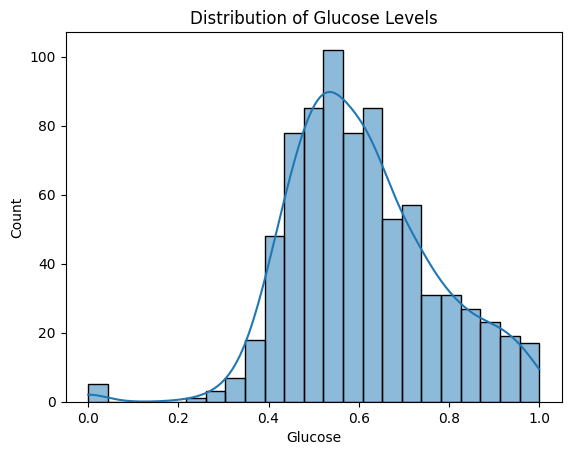

In [49]:
sns.histplot(data=dataset, x='Glucose', kde=True)
plt.title('Distribution of Glucose Levels')
plt.show()

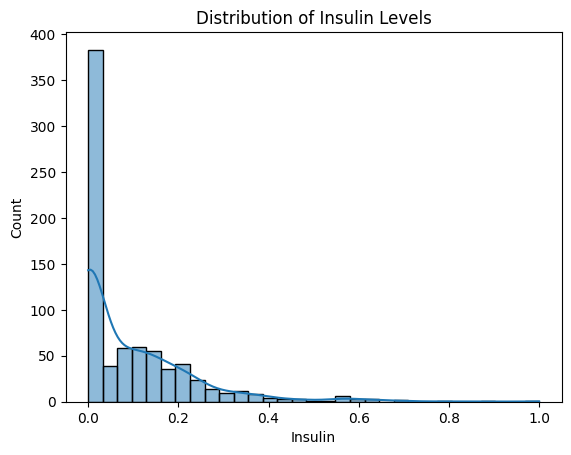

In [58]:
sns.histplot(data=dataset, x='Insulin', kde=True)
plt.title('Distribution of Insulin Levels')
plt.show()

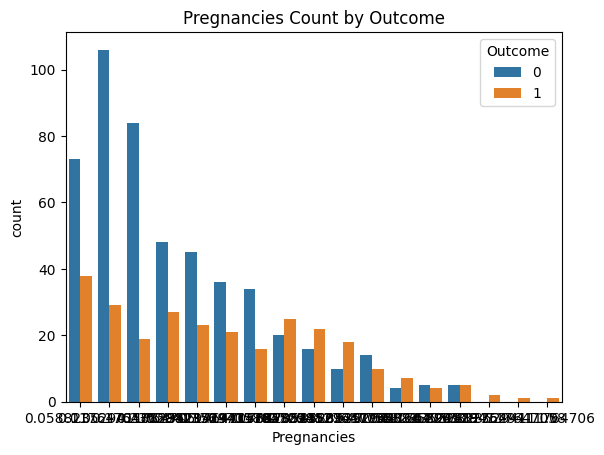

In [51]:
sns.countplot(data=dataset, x='Pregnancies', hue='Outcome')
plt.title('Pregnancies Count by Outcome')
plt.show()

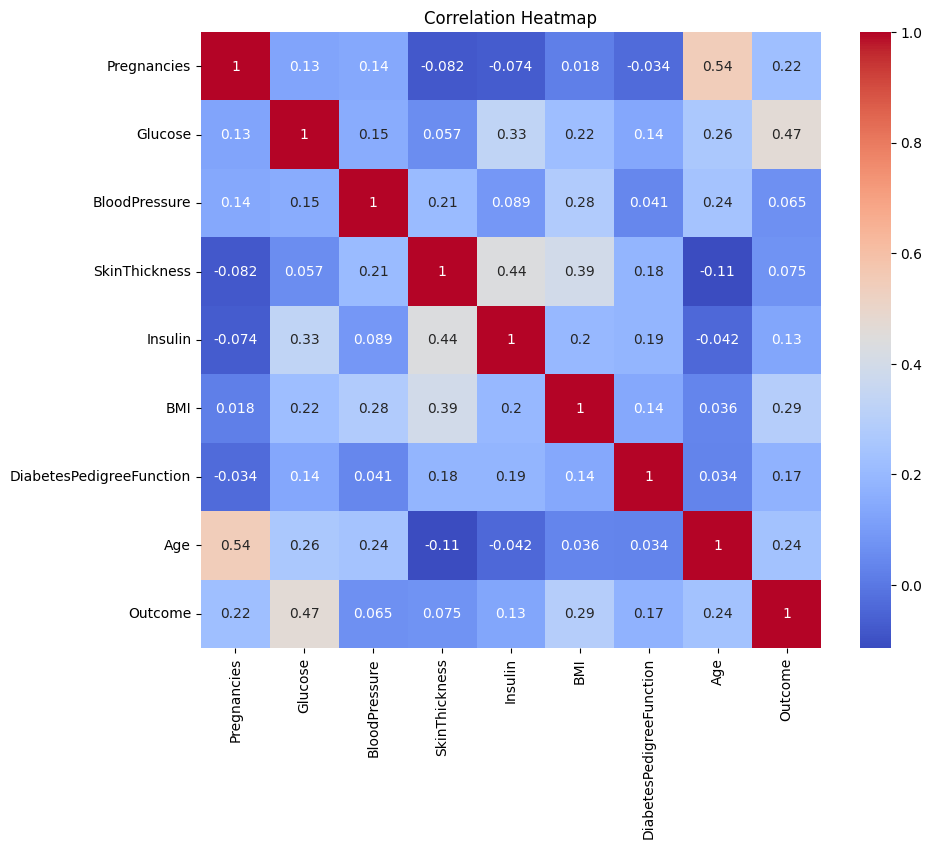

In [52]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# split data

In [53]:
# Check the shapes of the training and testing sets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (537, 8)
Testing data shape: (231, 8)


# model selection & traning

In [54]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

svm_model = SVC(random_state=42)
logistic_regression_model = LogisticRegression(random_state=42)
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

selected_models = [ svm_model, logistic_regression_model, gradient_boosting_model]


In [55]:
for model in selected_models:
    model.fit(X_train, y_train)


# Evaluation

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

for model in selected_models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print()
    print(f"Model: {model.__class__.__name__}")
    print()
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}")



Model: SVC

Accuracy: 0.7532467532467533
Precision: 0.6575342465753424
Recall: 0.6
F1 Score: 0.6274509803921569
ROC AUC Score: 0.7172185430463577

Model: LogisticRegression

Accuracy: 0.7445887445887446
Precision: 0.6521739130434783
Recall: 0.5625
F1 Score: 0.6040268456375839
ROC AUC Score: 0.7017798013245032

Model: GradientBoostingClassifier

Accuracy: 0.7489177489177489
Precision: 0.6309523809523809
Recall: 0.6625
F1 Score: 0.646341463414634
ROC AUC Score: 0.7286009933774835


Visualization 

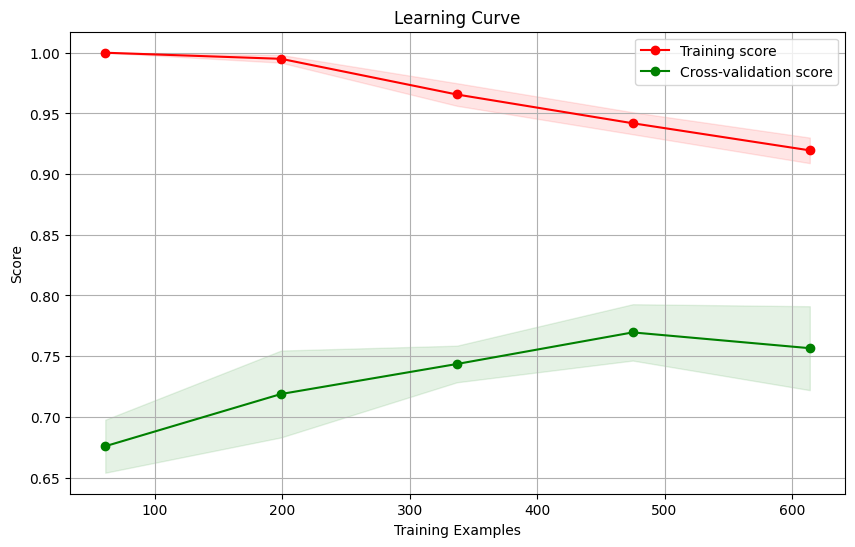

In [57]:
import numpy as np
from sklearn.model_selection import learning_curve


train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()
